In [1]:
import numpy as np 
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from countries import get_country_list

# Problems

## Why protected areas above 100%

Some countries have some protected areas recorded as points with a reported area. This point data is more uncertain than protected areas reported as polygons because overlaps cannot be identified or resolved. For this reason the total for countries is provided with and without the inclusion of the total reported area of protected areas recorded as points. The reported area of protected areas recorded as points can (individually or cumulatively) exceed the reference area used to calculate these indicators so coverages of greater than 100% can sometimes be reported.

## Last update 

June 2020

## Historical data

Not all protected areas have a designation date recorded. When there is no designation date the protected area is deemed to have always existed, therefore historical data maybe be overestimated.


# Load Data

## Protected Area by management objective

Total for category is the total area protected under that IUCN management designation. Note that because overlaps among protected areas are relatively common, the total protected area for a country is typically less than the sum of the disaggregated areas.

In [2]:
DATA_PATH = Path('./data')
PROTECTED_AREAS = DATA_PATH / 'OECD' / 'PROTECTED_AREAS_OBJECTIVE.csv'

protected_area = pd.read_csv(PROTECTED_AREAS)

In [3]:
protected_area.shape

(71910, 23)

In [4]:
protected_area.head()

,COU,Country,DESIG,Designation,DOMAIN,Domain,MEASURE,Measure,CALCULATION,Calculation method,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,IA,Ia: Strict Nature Reserve,TERRESTRIAL,Terrestrial,SQKM,Square kilometers,ERASED,Erased against precedent categories,...,1970,KM2,Square kilometres,0,Units,NaN,NaN,34770.33,NaN,NaN
1,AUS,Australia,IA,Ia: Strict Nature Reserve,TERRESTRIAL,Terrestrial,SQKM,Square kilometers,ERASED,Erased against precedent categories,...,1980,KM2,Square kilometres,0,Units,NaN,NaN,103556.25,NaN,NaN
2,AUS,Australia,IA,Ia: Strict Nature Reserve,TERRESTRIAL,Terrestrial,SQKM,Square kilometers,ERASED,Erased against precedent categories,...,1990,KM2,Square kilometres,0,Units,NaN,NaN,127115.19,NaN,NaN
3,AUS,Australia,IA,Ia: Strict Nature Reserve,TERRESTRIAL,Terrestrial,SQKM,Square kilometers,ERASED,Erased against precedent categories,...,1995,KM2,Square kilometres,0,Units,NaN,NaN,133699.95,NaN,NaN
4,AUS,Australia,IA,Ia: Strict Nature Reserve,TERRESTRIAL,Terrestrial,SQKM,Square kilometers,ERASED,Erased against precedent categories,...,2000,KM2,Square kilometres,0,Units,NaN,NaN,136012.95,NaN,NaN


In [5]:
# unique values per column
protected_area.nunique()

COU                        127
Country                    127
DESIG                        9
Designation                  9
DOMAIN                       2
Domain                       2
MEASURE                      2
Measure                      2
CALCULATION                  1
Calculation method           1
SCOPE                        1
Scope                        1
YEA                         17
Year                        17
Unit Code                    2
Unit                         2
PowerCode Code               1
PowerCode                    1
Reference Period Code        0
Reference Period             0
Value                    10090
Flag Codes                   0
Flags                        0
dtype: int64

In [6]:
# filter only Terrestrial protected area
protected_area = protected_area[protected_area['Domain'] == 'Terrestrial']
protected_area.shape

(37944, 23)

In [7]:
# filter only percentages (squer km make no sense by different sizes of countrys)
protected_area = protected_area[protected_area['Unit'] == 'Percentage']
protected_area.shape

(18972, 23)

In [8]:
# filter only last 5 years
protected_area = protected_area[protected_area['Year'] >= 2015]
protected_area.shape

(6696, 23)

In [9]:
# filter for needed countries
OECD_COUNTRIES = get_country_list()
protected_area = protected_area[protected_area['Country'].isin(OECD_COUNTRIES)]
assert len(OECD_COUNTRIES) == protected_area['Country'].unique().shape[0]

In [10]:
# select subset of columns needed
protected_area = protected_area[['Country', 'Year', 'Designation', 'Value']]

In [11]:
protected_area.head()

,Country,Year,Designation,Value
28,Australia,2015,Ia: Strict Nature Reserve,1.96
29,Australia,2016,Ia: Strict Nature Reserve,1.97
30,Australia,2017,Ia: Strict Nature Reserve,2.00
31,Australia,2018,Ia: Strict Nature Reserve,2.01
32,Australia,2019,Ia: Strict Nature Reserve,2.01


In [12]:
protected_area.describe()

,Year,Value
count,1566.000000,1566.000000
mean,2017.500000,5.128001
std,1.708371,8.648338
min,2015.000000,0.000000
25%,2016.000000,0.030000
50%,2017.500000,0.635000
75%,2019.000000,6.830000
max,2020.000000,51.370000


In [13]:
protected_area['Designation'].unique()

array(['Ia: Strict Nature Reserve', 'Ib: Wilderness Area',
       'II: National Park', 'III: Natural Monument or Feature',
       'IV: Habitat or Species Management Area',
       'V: Protected Landscape or Seascape',
       'VI: Protected area with sustainable use of natural resources',
       'No IUCN category provided',
       'All, including data recorded as points'], dtype=object)

In [14]:
# check for missing values
protected_area.isna().sum()

Country        0
Year           0
Designation    0
Value          0
dtype: int64

In [15]:
# create DataFrame with all vealues per country and year
protected_area = protected_area.pivot(index=['Country', 'Year'], columns='Designation', values='Value')
protected_area.columns.name = None
protected_area.head()

All, including data recorded as points  II: National Park  \
Country   Year                                                              
Australia 2015                                   18.14               3.67   
          2016                                   18.85               3.92   
          2017                                   19.10               4.04   
          2018                                   19.20               4.17   
          2019                                   19.20               4.17   

                III: Natural Monument or Feature  \
Country   Year                                     
Australia 2015                              0.25   
          2016                              0.26   
          2017                              0.24   
          2018                              0.24   
          2019                              0.24   

                IV: Habitat or Species Management Area  \
Country   Year                                           
Australia 2015                                    0.26   
          2016                                    0.27   
          2017                                    0.27   
          2018                                    0.27   
          2019                                    0.27   

                Ia: Strict Nature Reserve  Ib: Wilderness Area  \
Country   Year                                                   
Australia 2015                       1.96                 0.48   
          2016                       1.97                 0.55   
          2017                       2.00                 0.55   
          2018                       2.01                 0.57   
          2019                       2.01                 0.57   

                No IUCN category provided  V: Protected Landscape or Seascape  \
Country   Year                                                                  
Australia 2015                       0.51                                0.96   
          2016                       0.41                                0.98   
          2017                       0.39                                0.98   
          2018                       0.34                                0.98   
          2019                       0.34                                0.98   

                VI: Protected area with sustainable use of natural resources  
Country   Year                                                                
Australia 2015                                              10.05             
          2016                                              10.47             
          2017                                              10.62             
          2018                                              10.63             
          2019                                              10.63

In [16]:
protected_area = protected_area.rename(columns={
    'Ia: Strict Nature Reserve': 'perc_area_protected_obj_1a',
    'Ib: Wilderness Area': 'perc_area_protected_obj_1b',
    'II: National Park': 'perc_area_protected_obj_2',
    'III: Natural Monument or Feature': 'perc_area_protected_obj_3',
    'IV: Habitat or Species Management Area': 'perc_area_protected_obj_4',
    'V: Protected Landscape or Seascape': 'perc_area_protected_obj_5',
    'VI: Protected area with sustainable use of natural resources': 'perc_area_protected_obj_6',
    'No IUCN category provided': 'perc_area_protected_no_obj',
    'All, including data recorded as points': 'perc_area_protected_all_obj'
})

In [17]:
protected_area.shape

(174, 9)

In [18]:
protected_area.head(10)

perc_area_protected_all_obj  perc_area_protected_obj_2  \
Country   Year                                                           
Australia 2015                        18.14                       3.67   
          2016                        18.85                       3.92   
          2017                        19.10                       4.04   
          2018                        19.20                       4.17   
          2019                        19.20                       4.17   
          2020                        19.20                       4.17   
Austria   2015                        27.97                       2.43   
          2016                        28.45                       2.43   
          2017                        28.45                       2.38   
          2018                        28.54                       2.38   

                perc_area_protected_obj_3  perc_area_protected_obj_4  \
Country   Year                                                         
Australia 2015                       0.25                       0.26   
          2016                       0.26                       0.27   
          2017                       0.24                       0.27   
          2018                       0.24                       0.27   
          2019                       0.24                       0.27   
          2020                       0.24                       0.27   
Austria   2015                       0.01                       5.14   
          2016                       0.01                       5.62   
          2017                       0.01                       5.63   
          2018                       0.01                       5.80   

                perc_area_protected_obj_1a  perc_area_protected_obj_1b  \
Country   Year                                                           
Australia 2015                        1.96                        0.48   
          2016                        1.97                        0.55   
          2017                        2.00                        0.55   
          2018                        2.01                        0.57   
          2019                        2.01                        0.57   
          2020                        2.01                        0.57   
Austria   2015                        0.01                        0.04   
          2016                        0.01                        0.04   
          2017                        0.01                        0.12   
          2018                        0.01                        0.12   

                perc_area_protected_no_obj  perc_area_protected_obj_5  \
Country   Year                                                          
Australia 2015                        0.51                       0.96   
          2016                        0.41                       0.98   
          2017                        0.39                       0.98   
          2018                        0.34                       0.98   
          2019                        0.34                       0.98   
          2020                        0.34                       0.98   
Austria   2015                        4.74                      15.35   
          2016                        4.74                      15.34   
          2017                        4.71                      15.34   
          2018                        4.62                      15.35   

                perc_area_protected_obj_6  
Country   Year                             
Australia 2015                      10.05  
          2016                      10.47  
          2017                      10.62  
          2018                      10.63  
          2019                      10.63  
          2020                      10.63  
Austria   2015                       0.20  
          2016                       0.20  
          2017                       0.20  
          20

In [19]:
protected_area.describe()

,perc_area_protected_all_obj,perc_area_protected_obj_2,perc_area_protected_obj_3,perc_area_protected_obj_4,perc_area_protected_obj_1a,perc_area_protected_obj_1b,perc_area_protected_no_obj,perc_area_protected_obj_5,perc_area_protected_obj_6
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,23.100230,3.809080,0.485977,3.000862,0.345000,1.059425,7.439023,5.792011,1.120402
std,9.747826,6.274035,2.266092,3.537276,0.575788,1.929145,7.540017,6.503988,2.625979
min,10.030000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.470000,0.560000,0.000000,0.530000,0.000000,0.000000,0.510000,0.500000,0.000000
50%,21.265000,1.680000,0.015000,0.980000,0.060000,0.035000,4.945000,2.910000,0.000000
75%,27.980000,4.170000,0.070000,5.800000,0.460000,1.040000,11.460000,8.060000,0.370000
max,51.370000,32.980000,12.470000,19.030000,2.180000,7.530000,30.510000,25.240000,10.630000


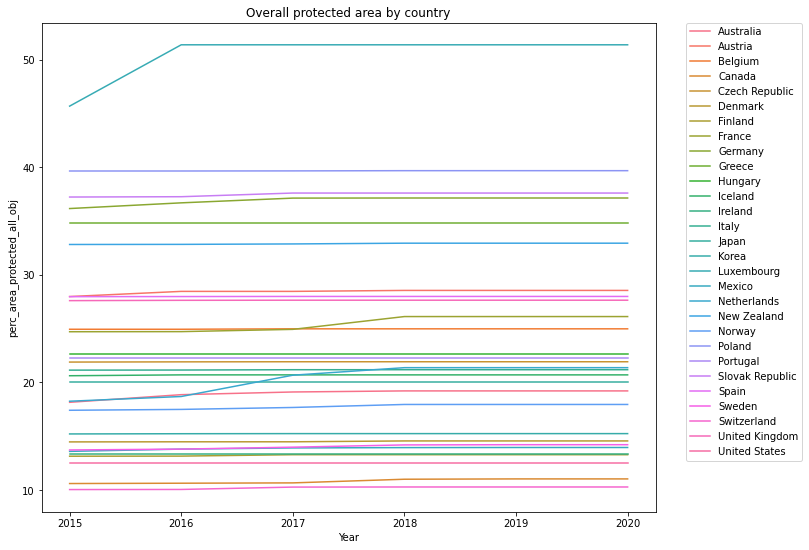

In [20]:
f, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Overall protected area by country')

sns.lineplot(
    data=protected_area,
    x='Year',
    y='perc_area_protected_all_obj',
    hue="Country")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()